## Data Loading

In [1]:
#!pip install numpy==1.22.4
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

## data read-in
cc_default = pd.read_csv('./UCI_Credit_Card.csv')
cc_default.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [2]:
## characterize the dataset
cc_default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

According to the preliminary review of the dataset, the data includes three kinds of data classifications: nominal, ordinal, and ratio. Specifically, nominal data in the columns of ID, SEX, and default.payment.next.month serve primary classification purposes without inherent ordering. Ordinal data are found in the columns EDUCATION, MARRIAGE, and PAY_0 to PAY_6, which are used to rank data in ordered categories. Ratio data are present in the columns for LIMIT_BAL, AGE, BILL_AMT1 to BILL_AMT6, and PAY_AMT1 to PAY_AMT6, which represent measurable quantities with meaningful zero points. In summary, the data within the eleven columns of ID, SEX, default.payment.next.month, EDUCATION, MARRIAGE, and PAY_0 to PAY_6 are categorical, whereas the data in the fourteen columns comprising LIMIT_BAL, AGE, BILL_AMT1 through BILL_AMT6, and PAY_AMT1 through PAY_AMT6 are numerical. 

In [3]:
## remove the irrelevant variable
cc_default_updated = cc_default.drop('ID', axis = 1)

The above code removes the ID column, because the ID in the data set only serves as an identifier for each individual and will not bring value to the prediction of Taiwanese credit card defaults.

In [4]:
## check for missing data
null_counts = cc_default_updated.isnull().sum()
print(null_counts)

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64


The above results can show that there is no missing data in the data set. The 0 values in the PAY_0 to PAY_6 columns refer to the minimum payment made by the customer, but the full credit card payment was not paid off. 

In [5]:
## descriptive statistics for relevant variables (numerical)
features = [
    'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 
    'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
    ]
descriptive_stats = cc_default_updated[features].describe()
print(descriptive_stats)

            LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    167484.322667      1.603733      1.853133      1.551867     35.485500   
std     129747.661567      0.489129      0.790349      0.521970      9.217904   
min      10000.000000      1.000000      0.000000      0.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     41.000000   
max    1000000.000000      2.000000      6.000000      3.000000     79.000000   

              PAY_0         PAY_2         PAY_3         PAY_4         PAY_5  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      -0.016700     -0.133767     -0.166200     -0.220667     -0.266200   
std        1.123802      1.197186

I believe the primary variables related to default, the "Default.Payment.Next.Month" variable, include credit limit (LIMIT_BAL), gender (SEX), individual education level (EDUCATION), marital status (MARRIAGE), age (AGE), repayment history (PAY_0 to PAY_6), and spending behavior (BILL_AMT1 to BILL_AMT6). Below is a graphical representation of these features.


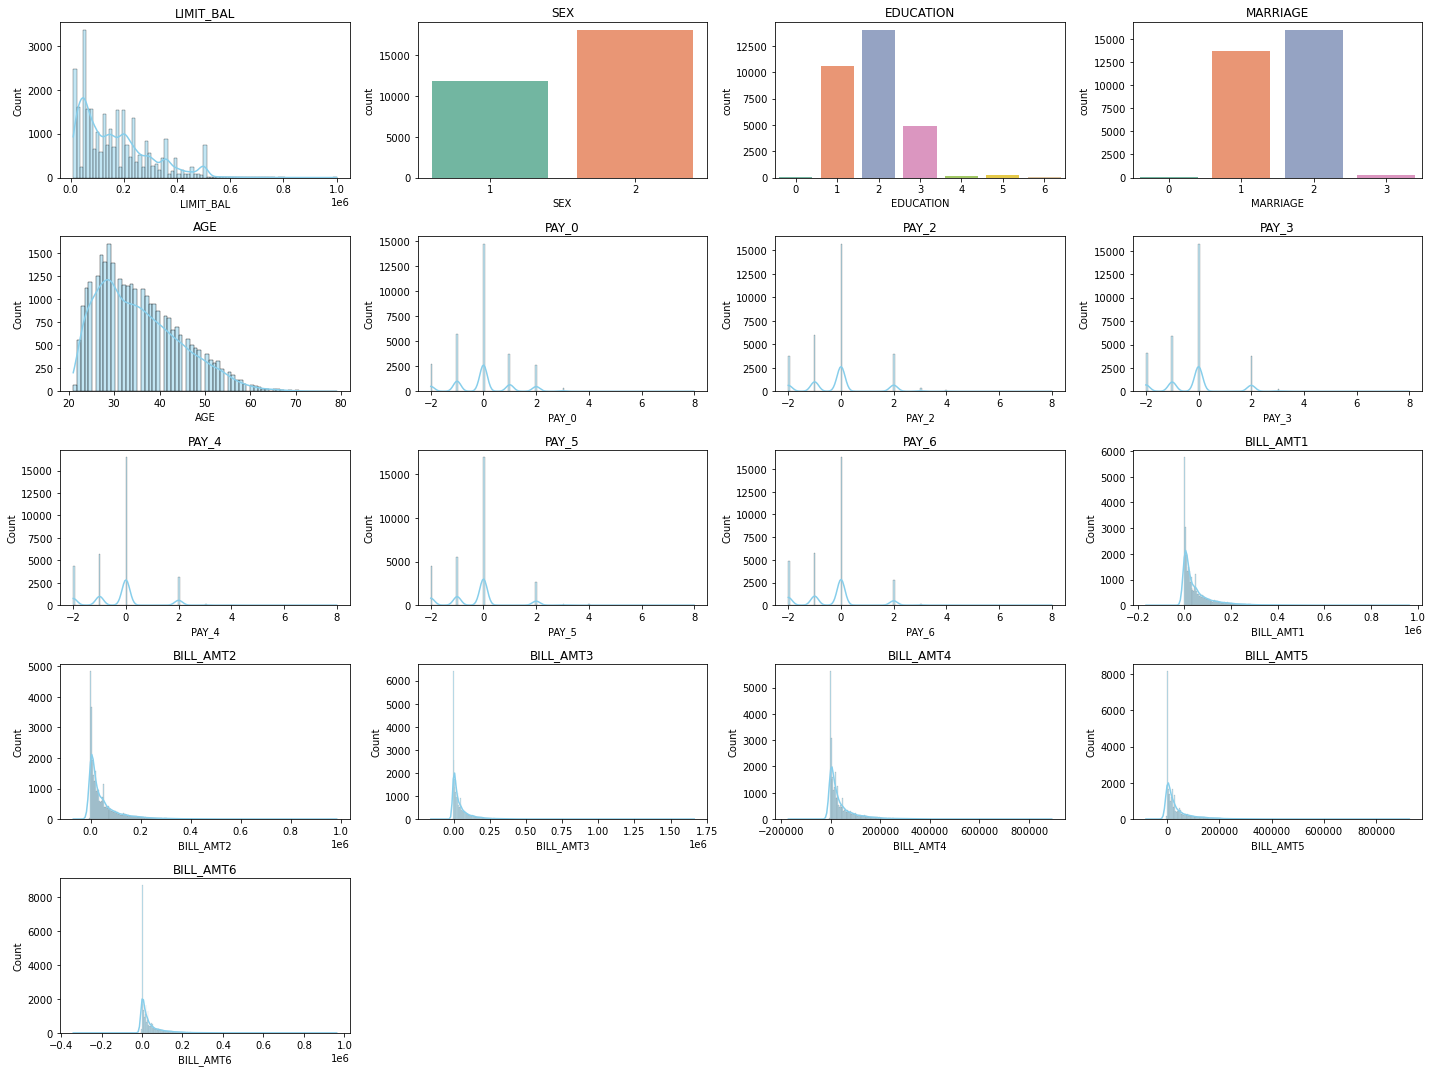

In [6]:
## descriptive statistics (graphical)
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features, 1):
    plt.subplot(5, 4, i)  # Arrange plots in a grid of 5x4
    if feature in ['SEX', 'EDUCATION', 'MARRIAGE']:
        sns.countplot(x=feature, data=cc_default_updated, palette='Set2')
    else:
        sns.histplot(cc_default_updated[feature], kde=True, color='skyblue')
    plt.title(feature)
    plt.tight_layout()
plt.show()

## Data Preprocessing

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Define features and target variable
X = cc_default_updated.drop(['default.payment.next.month'], axis=1)
y = cc_default_updated['default.payment.next.month']

## Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((24000, 23), (6000, 23), (24000,), (6000,))

The dataset has been split into training and testing sets, with 24,000 samples for training and 6,000 for testing, each consisting of 23 features after scaling.

## Model Training and Evaluation

In [8]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, RocCurveDisplay

## Train the SVM model
svm = SVC(random_state=42, probability=True) # Enable probability estimation
svm.fit(X_train_scaled, y_train)

## Predictions
svm_predictions = svm.predict(X_test_scaled)
svm_probabilities = svm.predict_proba(X_test_scaled)[:, 1] # Get probabilities for the positive class

## Evaluation
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)
svm_report = classification_report(y_test, svm_predictions)
svm_roc_auc = roc_auc_score(y_test, svm_probabilities)

## Print evaluation results
print("Accuracy:",svm_accuracy)
print("Confusion Matrix:\n",svm_conf_matrix)
print(svm_report)
print(f"SVM ROC-AUC Score: {svm_roc_auc}")

Accuracy: 0.8193333333333334
Confusion Matrix:
 [[4480  207]
 [ 877  436]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      4687
           1       0.68      0.33      0.45      1313

    accuracy                           0.82      6000
   macro avg       0.76      0.64      0.67      6000
weighted avg       0.80      0.82      0.79      6000

SVM ROC-AUC Score: 0.7143235872552478


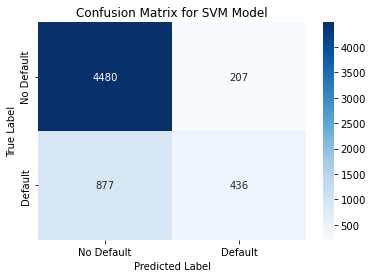

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

## Creating a heatmap for the SVM model's confusion matrix
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Default', 'Default'], 
            yticklabels=['No Default', 'Default']) 
plt.title('Confusion Matrix for SVM Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [10]:
from sklearn.ensemble import RandomForestClassifier

## Train Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

## Predictions 
rf_predictions = rf.predict(X_test)
rf_probabilities = rf.predict_proba(X_test)[:, 1] 

## Calculate metrics
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)
rf_report = classification_report(y_test, rf_predictions)
rf_roc_auc = roc_auc_score(y_test, rf_probabilities)

## Print evaluation results
print("Accuracy:",rf_accuracy)
print("Confusion Matrix:\n",rf_conf_matrix)
print(rf_report)
print(f"Random Forest ROC-AUC Score: {rf_roc_auc}")

Accuracy: 0.816
Confusion Matrix:
 [[4413  274]
 [ 830  483]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.64      0.37      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.74      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000

Random Forest ROC-AUC Score: 0.7577788444679593


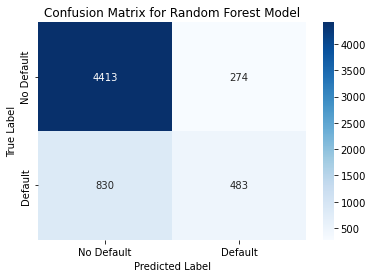

In [11]:
## Creating a heatmap for the Random Forest model's confusion matrix
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Default', 'Default'], 
            yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix for Random Forest Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Initial Results and Assessment

Both models show comparable performance, with SVM having a slight edge in accuracy. The SVM model achieved an accuracy of approximately 81.93% on the test set. Here's a detailed breakdown of the model's performance:

Precision for class 0 (no default): 84%,
Recall for class 0: 96%,
Precision for class 1 (default): 68%,
Recall for class 1: 33%

The Random Forest model achieved an accuracy of approximately 81.6% on the test set. Here’s a breakdown of the model’s performance:

Precision for class 0 (no default): 84%,
Recall for class 0: 94%,
Precision for class 1 (default): 64%,
Recall for class 1: 37%

Both models are relatively good at predicting non-default cases and highly effective at identifying actual non-default cases. However, when the SVM model predicts a default, it is correct 68% of the time, and when the Random Forest model predicts a default, it is accurate 64% of the time. Both models have low recall for class 1, indicating they miss a significant number of actual default cases.

The confusion matrix results are as follows:

SVM model:
True Non-Defaults (True Negtaives): 4480,
False Non-Defaults (False Negatives): 877, 
False Defaults (False Positives): 207,
True Defaults (True Positives): 436

Random Forest model:
True Non-Defaults (True Negatives): 4413,
False Non-Defaults (False Negatives): 830, 
False Defaults (False Positives): 274, 
True Defaults (True Positives): 483

These results indicate that both models have higher rates of False Defaults (where non-defaults are incorrectly predicted as defaults), reflecting the low recall for class 1. 

## Challenges

The SVM and Random Forest models exhibit satisfactory overall accuracy but face challenges in effectively identifying default cases (class 1). Both models struggle with low recall for defaults, which measures their ability to correctly identify all relevant instances of credit card defaults. Specifically, the SVM model misses about 67% of default cases, indicating a significant gap in detecting true defaults. Additionally, both models display only moderate precision for defaults, with SVM and Random Forest achieving precision scores of 0.68 and 0.64, respectively. This suggests that a considerable portion of the predictions made by these models falsely identifies non-defaulters as defaulters. The results highlight a need to enhance both the recall and precision for class 1 to improve the models' effectiveness in predicting credit card defaults accurately.

## Solutions and Reassessment

## 1: addressing class imbalance

In [12]:
## Adjust class weights - SVM
from sklearn.svm import SVC

## Adjusting class weights
svm_weighted = SVC(class_weight = 'balanced', random_state=42)

## Fit the model
svm_weighted.fit(X_train_scaled, y_train)

## Evaluate the model
y_pred_svm_weighted = svm_weighted.predict(X_test_scaled)
decision_scores_weighted = svm_weighted.decision_function(X_test_scaled)  # Get decision function scores

## Print evaluation results
print("Accuracy:",accuracy_score(y_test,y_pred_svm_weighted))
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred_svm_weighted))
print(classification_report(y_test, y_pred_svm_weighted))
print("ROC-AUC Score:",roc_auc_score(y_test, decision_scores_weighted)) # Calculate ROC-AUC using decision function

Accuracy: 0.7736666666666666
Confusion Matrix:
 [[3872  815]
 [ 543  770]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      4687
           1       0.49      0.59      0.53      1313

    accuracy                           0.77      6000
   macro avg       0.68      0.71      0.69      6000
weighted avg       0.79      0.77      0.78      6000

ROC-AUC Score: 0.7568089923498923


In [13]:
## Adjust class weights - Random Forest
from sklearn.ensemble import RandomForestClassifier

## Adjusting class weights
rf_weighted = RandomForestClassifier(class_weight='balanced', random_state=42)

## Fit the model
rf_weighted.fit(X_train, y_train)

## Evaluate the model
y_pred_rf_weighted = rf_weighted.predict(X_test)
y_proba_rf_weighted = rf_weighted.predict_proba(X_test)[:, 1]

## Print evaluation results
print("Accuracy:",accuracy_score(y_test,y_pred_rf_weighted))
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred_rf_weighted))
print(classification_report(y_test, y_pred_rf_weighted))
print("ROC-AUC Score:",roc_auc_score(y_test, y_proba_rf_weighted))

Accuracy: 0.8151666666666667
Confusion Matrix:
 [[4443  244]
 [ 865  448]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.65      0.34      0.45      1313

    accuracy                           0.82      6000
   macro avg       0.74      0.64      0.67      6000
weighted avg       0.80      0.82      0.79      6000

ROC-AUC Score: 0.7592317945749706


In [14]:
## SMOTE - SVM
from imblearn.over_sampling import SMOTE

## Applying SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

## Scaling the resampled data
scaler_new = StandardScaler()
X_resampled_scaled = scaler_new.fit_transform(X_resampled)
X_test_scaled = scaler_new.transform(X_test)

## Train the SVM model on the resampled and scaled data
svm_smote = SVC(random_state=42, probability = True)
svm_smote.fit(X_resampled_scaled, y_resampled)

## Predictions
svm_predictions = svm_smote.predict(X_test_scaled)
svm_proba = svm_smote.predict_proba(X_test_scaled)[:, 1]

## Evaluation
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)
svm_report = classification_report(y_test, svm_predictions)
svm_roc_auc = roc_auc_score(y_test, svm_proba)

## Print evaluation results
print("Accuracy:",svm_accuracy)
print("Confusion Matrix:\n",svm_conf_matrix)
print(svm_report)
print("ROC-AUC Score:",svm_roc_auc)

Accuracy: 0.744
Confusion Matrix:
 [[3718  969]
 [ 567  746]]
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      4687
           1       0.43      0.57      0.49      1313

    accuracy                           0.74      6000
   macro avg       0.65      0.68      0.66      6000
weighted avg       0.77      0.74      0.76      6000

ROC-AUC Score: 0.7352428838918751


In [15]:
## SMOTE - Random Forest

## Train Random Forest model
rf_s = RandomForestClassifier(random_state=42)
rf_s.fit(X_resampled, y_resampled)

## Predictions
rf_predictions = rf_s.predict(X_test)
rf_probabilities = rf_s.predict_proba(X_test)[:, 1] 

## Evaluation
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)
rf_report = classification_report(y_test, rf_predictions)
rf_roc_auc = roc_auc_score(y_test, rf_probabilities)

print("Accuracy:",rf_accuracy)
print("Confusion Matrix:\n",rf_conf_matrix)
print(rf_report)
print("ROC-AUC Score:",rf_roc_auc)

Accuracy: 0.779
Confusion Matrix:
 [[4052  635]
 [ 691  622]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      4687
           1       0.49      0.47      0.48      1313

    accuracy                           0.78      6000
   macro avg       0.67      0.67      0.67      6000
weighted avg       0.78      0.78      0.78      6000

ROC-AUC Score: 0.7404571085196028


## 2: hyperparameter tuning

In [16]:
## SVM Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

## Convert scaled arrays back to DataFrame for consistent indexing
X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)

## Taking a smaller sample from the training dataset
X_train_sample = X_train_scaled.sample(frac=0.2, random_state=42)  # 20% of the original dataset to make the process computationally feasible
y_train_sample = y_train.loc[X_train_sample.index]

## Define the range of parameters to test with the SVM model to find the best combination
param_grid = {'C': [0.1, 1, 10], # Regularization parameter
              'kernel': ['linear', 'rbf'], # Type of SVM kernel
              'gamma': ['scale', 'auto']  # Kernel coefficient
             }

## Initialize the GridSearchCV object for SVM with cross-validation
grid_search_svm = GridSearchCV(SVC(class_weight='balanced', random_state = 42, probability = True), param_grid, cv=5, scoring='accuracy')

## Perform random search
grid_search_svm.fit(X_train_sample, y_train_sample)

## Best parameters and best score
print("Best Parameters:", grid_search_svm.best_params_)
print("Best Score:", grid_search_svm.best_score_)

## Retrieve the best model
best_model_svm = grid_search_svm.best_estimator_
y_pred_svm = best_model_svm.predict(X_test_scaled)
y_scores_svm = best_model_svm.predict_proba(X_test_scaled)[:, 1] 

## Evaluate the model
accuracy = accuracy_score(y_test, y_pred_svm)
conf_matrix = confusion_matrix(y_test, y_pred_svm)
classification_rep = classification_report(y_test, y_pred_svm)
roc_auc = roc_auc_score(y_test, y_scores_svm)

## Print evaluation results
print("Improved SVM Performance:")
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")
print(f"ROC-AUC Score: {roc_auc}")

Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score: 0.7835416666666666
Improved SVM Performance:
Accuracy: 0.8023333333333333
Confusion Matrix:
[[4181  506]
 [ 680  633]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      4687
           1       0.56      0.48      0.52      1313

    accuracy                           0.80      6000
   macro avg       0.71      0.69      0.70      6000
weighted avg       0.79      0.80      0.80      6000

ROC-AUC Score: 0.750155792195392


In [17]:
## Random Forest Hyperparameter Tuning

## Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200, 300],
        'max_features': ['auto', 'sqrt'],
        'max_depth': [None, 10, 20]
}

## Initialize the GridSearchCV object for Random Forest with cross-validation
grid_search_rf = GridSearchCV(RandomForestClassifier(class_weight='balanced',random_state=42), param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

## Perform grid search
grid_search_rf.fit(X_train, y_train)

## Best parameters and best score
print("Best Parameters:", grid_search_rf.best_params_)
print("Best Score:", grid_search_rf.best_score_)

## Retrieve the best model
best_model_rf = grid_search_rf.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)
y_scores_rf = best_model_rf.predict_proba(X_test)[:, 1]

## Evaluate the model
print("Accuracy:",accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred_rf))
print("Improved Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:",roc_auc_score(y_test, y_scores_rf))

Best Parameters: {'max_depth': None, 'max_features': 'auto', 'n_estimators': 200}
Best Score: 0.8155833333333333
Accuracy: 0.8151666666666667
Confusion Matrix:
 [[4448  239]
 [ 870  443]]
Improved Random Forest Performance:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.65      0.34      0.44      1313

    accuracy                           0.82      6000
   macro avg       0.74      0.64      0.67      6000
weighted avg       0.80      0.82      0.79      6000

ROC-AUC Score: 0.7612481152597379


## 3: using other ensemble methods

In [18]:
## 1: AdaBoost
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

## Weights for AdaBoost to handle class imbalance
weights = np.where(y_train == 1, 1, 0.5)  # Increase weight for class '1'

## Initialize AdaBoost with a base estimator
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                                   n_estimators=50, random_state=42)

## Train the AdaBoost model 
ada_boost.fit(X_train, y_train, sample_weight=weights)

## Predicting on the test set 
y_pred_ada = ada_boost.predict(X_test)
y_proba_ada = ada_boost.predict_proba(X_test)[:, 1]

## Evaluation
print("Accuracy:",accuracy_score(y_test, y_pred_ada))
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred_ada))
print("AdaBoost Model Performance:")
print(classification_report(y_test, y_pred_ada))
print("ROC-AUC Score:",roc_auc_score(y_test, y_proba_ada))

Accuracy: 0.8071666666666667
Confusion Matrix:
 [[4204  483]
 [ 674  639]]
AdaBoost Model Performance:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4687
           1       0.57      0.49      0.52      1313

    accuracy                           0.81      6000
   macro avg       0.72      0.69      0.70      6000
weighted avg       0.80      0.81      0.80      6000

ROC-AUC Score: 0.7734180247060828


In [19]:
from sklearn.model_selection import GridSearchCV

## Parameters of the base estimator
tree_params = {
    'base_estimator__max_depth': [1, 2, 3],  
    'base_estimator__min_samples_split': [2, 4, 6] 
}

## AdaBoost specific parameters
ada_params = {
    'n_estimators': [50, 100, 200],  
    'learning_rate': [0.01, 0.1, 1]  
}

## Combine parameters
param_grid = {**tree_params, **ada_params}

## Base estimator
base_tree = DecisionTreeClassifier(random_state=42)

## Initialize AdaBoost with the base estimator
ada_boost = AdaBoostClassifier(base_estimator=base_tree, random_state=42)

## Setup GridSearchCV
grid_search = GridSearchCV(ada_boost, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

## Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

## Best model
best_ada = grid_search.best_estimator_

## Predict on the test set and calculate probabilities for ROC-AUC
y_pred_best_ada = best_ada.predict(X_test)
y_proba_best_ada = best_ada.predict_proba(X_test)[:, 1]

## Print evaluation results
print("Accuracy:",accuracy_score(y_test, y_pred_best_ada))
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred_best_ada))
print("Improved AdaBoost Model Performance:")
print(classification_report(y_test, y_pred_best_ada))
print("ROC-AUC Score:",roc_auc_score(y_test, y_proba_best_ada))

Best Parameters: {'base_estimator__max_depth': 3, 'base_estimator__min_samples_split': 2, 'learning_rate': 0.01, 'n_estimators': 200}
Best Score: 0.8219166666666666
Accuracy: 0.8203333333333334
Confusion Matrix:
 [[4470  217]
 [ 861  452]]
Improved AdaBoost Model Performance:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.68      0.34      0.46      1313

    accuracy                           0.82      6000
   macro avg       0.76      0.65      0.67      6000
weighted avg       0.80      0.82      0.80      6000

ROC-AUC Score: 0.7718689587361519


In [20]:
## 2: XGBoost

#!pip install xgboost
from xgboost import XGBClassifier

## Give a weight for correcting class imbalance
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

## Initialize and train the XGBoost classifier
xgb = XGBClassifier(scale_pos_weight = scale_pos_weight, 
                    use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

## Predict on the testing set and get probability scores
y_pred_xgb = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]

## Evaluate the model
print("Accuracy:",accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred_xgb))
print("XGBoost Model Performance:")
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC Score:",roc_auc_score(y_test, y_proba_xgb))

Accuracy: 0.7631666666666667
Confusion Matrix:
 [[3809  878]
 [ 543  770]]
XGBoost Model Performance:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      4687
           1       0.47      0.59      0.52      1313

    accuracy                           0.76      6000
   macro avg       0.67      0.70      0.68      6000
weighted avg       0.79      0.76      0.77      6000

ROC-AUC Score: 0.7680177431670396


In [21]:
## Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0]
}

## Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

## Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

## Best model, prediction, and probabilities calculation 
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
y_proba_best = best_model.predict_proba(X_test)[:, 1]

## Evaluate the model
print("Accuracy:",accuracy_score(y_test, y_pred_best))
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred_best))
print("Improved XGBoost Model Performance:")
print(classification_report(y_test, y_pred_best))
print("ROC-AUC Score:",roc_auc_score(y_test, y_proba_best))

Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
Best Score: 0.78775
Accuracy: 0.7835
Confusion Matrix:
 [[4061  626]
 [ 673  640]]
Improved XGBoost Model Performance:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      4687
           1       0.51      0.49      0.50      1313

    accuracy                           0.78      6000
   macro avg       0.68      0.68      0.68      6000
weighted avg       0.78      0.78      0.78      6000

ROC-AUC Score: 0.7515002768104353


## 4: adjusting decision threshold

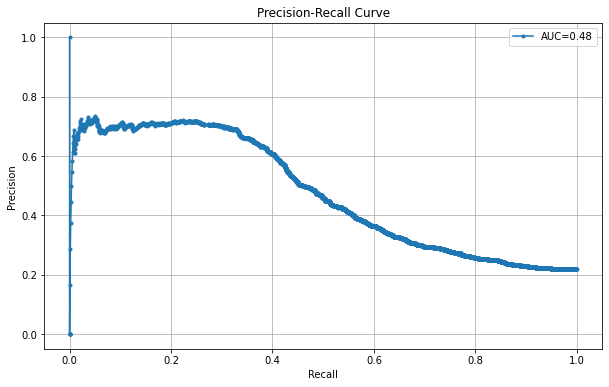

In [22]:
## SVM
from sklearn.metrics import precision_recall_curve, auc
 
## Train SVM with probability output
svm = SVC(probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)
y_probs = svm.predict_proba(X_test_scaled)[:, 1]

## Calculate precision-recall curve and the area under the curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
pr_auc = auc(recall, precision)

## Plotting Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.', label=f'AUC={pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


In [23]:
## Function to apply threshold and evaluate model
def evaluate_threshold(threshold):
    y_pred_adjusted = (y_probs >= threshold).astype(int)
    accuracy_adjusted = accuracy_score(y_test, y_pred_adjusted)
    classification_rep_adjusted = classification_report(y_test, y_pred_adjusted)
    conf_matrix_adjusted = confusion_matrix(y_test, y_pred_adjusted)
    roc_auc = roc_auc_score(y_test, y_probs)  # Using probabilities for ROC-AUC

    print(f"Threshold: {threshold}")
    print("Accuracy:", accuracy_adjusted)
    print("Confusion Matrix:\n", conf_matrix_adjusted)
    print(classification_rep_adjusted)
    print("ROC-AUC Score:", roc_auc)
    print("\n")

## Evaluate at different thresholds
evaluate_threshold(0.14)
evaluate_threshold(0.81)

Threshold: 0.14
Accuracy: 0.29133333333333333
Confusion Matrix:
 [[ 544 4143]
 [ 109 1204]]
              precision    recall  f1-score   support

           0       0.83      0.12      0.20      4687
           1       0.23      0.92      0.36      1313

    accuracy                           0.29      6000
   macro avg       0.53      0.52      0.28      6000
weighted avg       0.70      0.29      0.24      6000

ROC-AUC Score: 0.6945207945816327


Threshold: 0.81
Accuracy: 0.7841666666666667
Confusion Matrix:
 [[4673   14]
 [1281   32]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4687
           1       0.70      0.02      0.05      1313

    accuracy                           0.78      6000
   macro avg       0.74      0.51      0.46      6000
weighted avg       0.77      0.78      0.70      6000

ROC-AUC Score: 0.6945207945816327




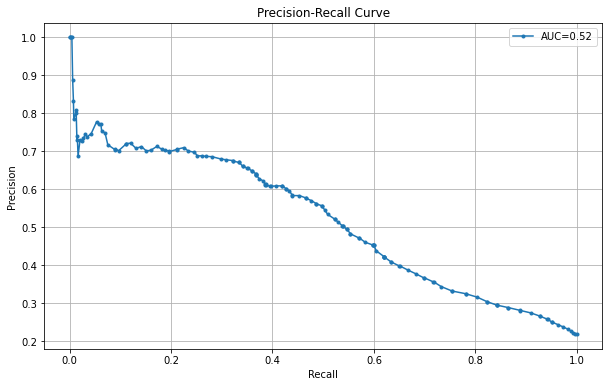

In [24]:
## Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

## Get prediction probabilities
y_probs_rf = rf.predict_proba(X_test)[:, 1]

## Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs_rf)

## Calculating the area under the precision-recall curve
pr_auc_rf = auc(recall, precision)

## Plotting Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.', label=f'AUC={pr_auc_rf:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


In [25]:
## Function to evaluate the model at different thresholds
def evaluate_threshold(threshold):
    y_pred_adjusted_rf = (y_probs_rf >= threshold).astype(int)
    accuracy_adjusted_rf = accuracy_score(y_test, y_pred_adjusted_rf)
    classification_rep_adjusted_rf = classification_report(y_test, y_pred_adjusted_rf)
    conf_matrix_adjusted_rf = confusion_matrix(y_test, y_pred_adjusted_rf)
    roc_auc_rf = roc_auc_score(y_test, y_probs_rf)  

    print(f"Threshold: {threshold}")
    print("Accuracy:", accuracy_adjusted_rf)
    print("Confusion Matrix:\n", conf_matrix_adjusted_rf)
    print(classification_rep_adjusted_rf)
    print("ROC-AUC Score:", roc_auc_rf)
    print("\n")

## Evaluate at different thresholds
evaluate_threshold(0.10)
evaluate_threshold(0.84)

Threshold: 0.1
Accuracy: 0.45366666666666666
Confusion Matrix:
 [[1528 3159]
 [ 119 1194]]
              precision    recall  f1-score   support

           0       0.93      0.33      0.48      4687
           1       0.27      0.91      0.42      1313

    accuracy                           0.45      6000
   macro avg       0.60      0.62      0.45      6000
weighted avg       0.78      0.45      0.47      6000

ROC-AUC Score: 0.7577788444679593


Threshold: 0.84
Accuracy: 0.7895
Confusion Matrix:
 [[4667   20]
 [1243   70]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      4687
           1       0.78      0.05      0.10      1313

    accuracy                           0.79      6000
   macro avg       0.78      0.52      0.49      6000
weighted avg       0.79      0.79      0.71      6000

ROC-AUC Score: 0.7577788444679593


